## 데이터 준비 및 확인

In [40]:
# 필요한 라이브러리 불러오기

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [11]:
# 사용할 예제 데이터 (bream & smelt)

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0,
                9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0,
                6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

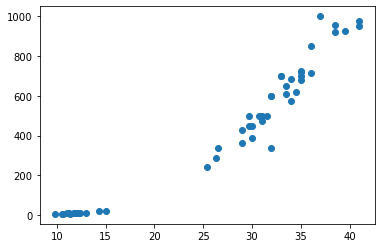

In [12]:
# 전체 데이터 산점도

plt.figure()
plt.scatter(fish_length, fish_weight)
plt.show()

In [14]:
# 설명변수(X)

fish_data = np.column_stack([fish_length, fish_weight]) # column_stack() - 여러 array를 행방향으로 이어붙임

In [16]:
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [38]:
# 타겟변수(y) 설정 (1 = bream, 0 = smelt)

fish_target = np.concatenate([np.ones(35), np.zeros(14)]) # concatenate() - 여러 array를 이어붙이는 함수(pd.concat와 유사함)

## 데이터 분할 (train_test_split)

In [51]:
# train / test data 분할

train_X, test_X, train_y, test_y = train_test_split(fish_data, fish_target, test_size = 0.2, 
                                                    stratify = fish_target, random_state = 1004)

#### "stratify = [target data]" in train_test_split
- 클래스 비율에 맞게 데이터를 나눔.
- 훈련 데이터가 작거나 데이터 불균형일 때 특히 유용                        

In [74]:
# stratify를 이용하여 데이터의 클래스 비율이 일정하게 나뉜 것을 확인할 수 있다.

((fish_target == 1).sum() / (fish_target == 0).sum(), # 원데이터 1:0 비율
round((train_y == 1).sum() / (train_y == 0).sum(),2), # train데이터 1:0 비율
round((test_y == 1).sum() / (test_y == 0).sum(),2))   # test데이터 1:0 비율

(2.5, 2.55, 2.33)

In [77]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((39, 2), (10, 2), (39,), (10,))

## 모델링
- train 데이터는 학습 시 사용한다.
- 모델의 성능평가는 훈련에 사용되지 않은 test 데이터로 해야한다.

In [83]:
# KNN 분류모델 

KN = KNeighborsClassifier()

KN.fit(train_X, train_y)
KN.score(test_X, test_y) # 정확도는 100%

1.0

※ 전혀 새로운 값인 (25,150)의 값을 갖는 1(bream)은 어떻게 분류될까?

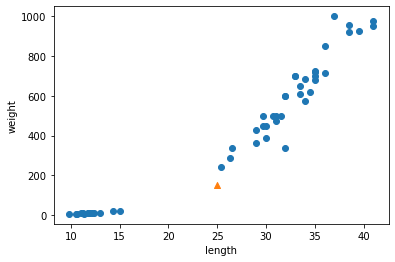

In [96]:
# 새로운 값 (25,150) 등장

plt.figure()

plt.scatter(fish_data[:,0], fish_data[:,1])
plt.scatter(25, 150, marker = '^') # 새로운 값 - 직관적인 시각으로 1(bream)에 가까워 보이고, 실제로도 1이 맞음.

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [94]:
KN.predict([[25,150]]) # 0(smelt)으로 분류

array([0.])

#### "kneighbors() method" in KNeighborsClassifier
- 주어진 샘플에서 가장 가까운 이웃을 찾아주는 메서드
- 가까운 이웃의 거리와 인덱스를 찾아준다.

In [118]:
# (25,150)과 가장 가까운 이웃 5개 찾아줌 (n_neighbors = 5로 설정되어 있기 때문)

distances, indexes = KN.kneighbors([[25,150]])

In [119]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 137.17988191 138.39320793]]


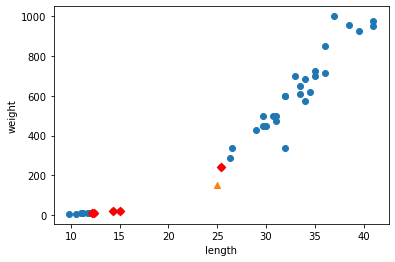

In [117]:
# train 데이터를 이용한 시각화

plt.scatter(train_X[:,0], train_X[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_X[indexes,0], train_X[indexes,1], c = 'red', marker = 'D') # nearest neighbors

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 위의 그래프에서 그래프상 더 멀어보이는 값들이 가까운 이웃으로 선정된 것을 볼 수 있다.  
- 이유는??  
→ 두 특성의 스케일이 다르기 때문
- 알고리즘이 거리 기반 알고리즘일 때 특성들 간의 스케일 차이가 크면 올바른 예측이 불가능하다.  
→ 올바른 전처리 필요

## Standard Score Scaling
- Standard Score, 표준점수(혹은 z score)는 각 특성값이 0에서 표준편차의 몇 배만큼 떨어져 있는지 나타냄
- 중요한 점은 test 데이터도 train 데이터의 평균/표준편차를 이용하여 스케일링을 해야한다는 것임

In [136]:
# Standard Score Scaling

mean = np.mean(train_X, axis = 0)
std = np.std(train_X, axis = 0)

train_scaled = (train_X - mean) / std
test_scaled = (test_X - mean) / std
print(train_scaled[:5])

[[-1.26962093 -1.31130434]
 [-0.17279614 -0.63100926]
 [-1.51665354 -1.34129486]
 [-0.0838644  -0.48411693]
 [-1.71427963 -1.35108768]]


In [137]:
# 스케일링한 데이터로 다시 모델링

KN.fit(train_scaled, train_y)
KN.score(test_scaled, test_y)

1.0

In [141]:
# 다시 (25,150) 분류

new = ([25,150] - mean) / std
KN.predict([new]) # 1(bream)로 정확히 분류!

array([1.])

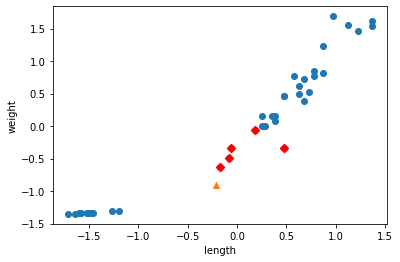

In [150]:
distances, indexes = KN.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], c = 'red', marker = 'D')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()